# 7. Calculus
http://docs.sympy.org/latest/tutorial/calculus.html

In [2]:
from sympy import *
init_session()

IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## Derivatives
To take derivatives, use the ***diff*** function.

In [3]:
diff(cos(x), x)

In [4]:
diff(exp(x**2), x)

diff can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. For example, both of the following find the third derivative of $x^4$.

In [5]:
diff(x**4, x, x, x)

In [6]:
diff(x**4, x, 3)

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives. For example, each of the following will compute $\frac{\partial^7}{\partial x\partial y^2\partial z^4} e^{x y z}$.

In [7]:
expr = exp(x*y*z)
expr

In [8]:
diff(expr, x, y, y, z, z, z, z)

In [9]:
diff(expr, x, y, 2, z, 4)

In [10]:
diff(expr, x, y, y, z, 4)

diff can also be called ***as a method***. The two ways of calling diff are exactly the same, and are provided only for convenience.

In [11]:
expr.diff(x, y, y, z, 4)

To create an unevaluated derivative, use the ***Derivative*** class. It has the same syntax as diff.

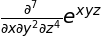

In [12]:
deriv = Derivative(expr, x, y, 2, z, 4)
deriv

To evaluate an unevaluated derivative, use the ***doit*** method.

In [13]:
deriv.doit()

These ***unevaluated objects*** are useful for delaying the evaluation of the derivative, or for printing purposes. They are also used when SymPy does not know how to compute the derivative of an expression (for example, if it contains an undefined function, which are described in the Solving Differential Equations section).

## Integrals
To compute an integral, use the integrate function. There are ***two kinds of integrals, definite and indefinite***. To compute an ***indefinite integral***, that is, an antiderivative, or primitive, just pass the variable after the expression.

In [14]:
integrate(cos(x), x)

Note that SymPy does not include the ***constant*** of integration. If you want it, you can add one yourself, or rephrase your problem as a differential equation and use dsolve to solve it, which does add the constant (see Solving Differential Equations).

#### Quick Tip
∞ in SymPy is oo (that’s the lowercase letter “oh” twice). This is because oo looks like ∞, and is easy to type.

To compute a definite integral, pass the argument (integration_variable, lower_limit, upper_limit). For example, to compute
>$\int_0^{\infty} e^{-x} \, dx$   

wei would do:

In [17]:
integrate(exp(-x), (x, 0, oo))

As with indefinite integrals, you can pass multiple limit tuples to perform a multiple integral. For example, to compute
> $\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy$  

do

In [21]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

If integrate is unable to compute an integral, it returns an ***unevaluated Integral*** object.

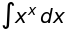

In [23]:
expr = integrate(x**x, x)
expr

As with ***Derivative***, you can create an unevaluated integral using ***Integral***. To later evaluate this integral, call doit.

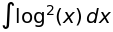

In [24]:
expr = Integral(log(x)**2, x)
expr

In [25]:
expr.doit()

integrate uses powerful algorithms that are always improving to compute both definite and indefinite integrals, including heuristic pattern matching type algorithms, a partial implementation of the Risch algorithm, and an algorithm using Meijer G-functions that is useful for computing integrals in terms of special functions, especially definite integrals. Here is a sampling of some of the power of integrate.

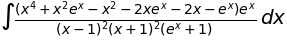

In [26]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

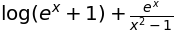

In [27]:
integ.doit()

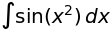

In [28]:
integ = Integral(sin(x**2), x)
integ

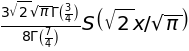

In [29]:
integ.doit()

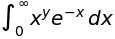

In [30]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

In [31]:
integ.doit()

⎧ Γ(y + 1)    for -re(y) < 1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

This last example returned a ***Piecewise*** expression because the integral does not converge unless ℜ(y)>1.

## Limits
SymPy can compute symbolic limits with the ***limit*** function. The syntax to compute
>$\lim_{x \to 0} \, f(x)$ 

is limit(f(x), x, 0).

In [36]:
limit(sin(x)/x, x, 0)

***limit*** should be used instead of ***subs*** whenever the point of evaluation is a singularity. Even though SymPy has objects to represent $\infty$ using them for evaluation is not reliable because they do not keep track of things like ***rate of growth***. Also, things like $\infty - \infty$ and $\frac{\infty}{\infty}$ return $\mathrm{nan}$ (not-a-number). For example

In [45]:
expr = x**2 / exp(x)
expr

In [46]:
expr.subs(x, oo)

In [47]:
limit(expr, x, oo)

Like Derivative and Integral, limit has an unevaluated counterpart, ***Limit***. To evaluate it, use ***doit***.

In [48]:
lim = Limit(expr, x, oo)
lim

In [49]:
lim.doit()

To evaluate a limit ***at one side only***, pass '+' or '-' as a third argument to limit. For example, to compute
>$\lim_{x\to 0^+}\frac{1}{x},$

do

In [50]:
limit(1 / x, x, 0, '+')

In [51]:
limit(1 / x, x, 0, '-')

## Series Expansion
SymPy can compute ***asymptotic series expansions*** of functions around a point. To compute the expansion of f(x) around the point x=x0 terms of order $x^n$, use ***f(x).series(x, x0, n)***. x0 and n can be omitted, in which case the ***defaults x0=0 and n=6*** will be used.

In [52]:
expr = exp(sin(x))
expr

In [53]:
expr.series(x, 0, 4)

The $O\left (x^4\right )$ term at the end represents the ***Landau order term at x=0*** (not to be confused with ***big O*** notation used in computer science, which generally represents the ***Landau order term at x=∞***). It means that ***all x terms with power greater than or equal to $x^4$ are omitted***. Order terms can be created and manipulated outside of series. They automatically absorb higher order terms.

In [57]:
x + x**3 + x**6 + O(x**4)

In [58]:
x*O(1)

If you do not want the order term, use the ***removeO*** method.

In [59]:
expr.series(x, 0, 4).removeO()

The O notation supports arbitrary limit points (other than 0):

In [60]:
exp(x - 6).series(x, x0 = 6)

## Finite differences
So far we have looked at expressions with analytical derivatives and primitive functions respectively. But what if we want to have an expression to estimate a derivative of a curve for which we lack a closed form representation, or for which we don’t know the functional values for yet. One approach would be to use a ***finite difference*** approach.

You can use the ***as_finite_diff*** method of on any Derivative instance to generate approximations to derivatives of arbitrary order:

In [61]:
f = Function('f')
dfdx = f(x).diff(x)
as_finite_diff(dfdx)

here the first order derivative was approximated around x using a minimum number of points (2 for 1st order derivative) evaluated equidistantly using a step-size of 1. We can use arbitrary steps (possibly containing symbolic expressions):

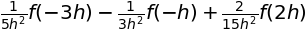

In [62]:
f = Function('f')
d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
as_finite_diff(d2fdx2, [-3*h,-h,2*h])

If you are just interested in evaluating the weights, you can do so manually:

In [64]:
finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1]

note that we only need the last element in the last sublist returned from finite_diff_weights. The reason for this is that finite_diff_weights also generates weights for lower derivatives and using fewer points (see the documentation of finite_diff_weights for more details).

if using finite_diff_weights directly looks complicated and the as_finite_diff function operating on Derivative instances is not flexible enough, you can use apply_finite_diff which takes order, x_list, y_list and x0 as parameters:

In [65]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)